In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



1) Create a covariance matrix, find the eigenvectors and the eigenvalues

In [126]:
# i. Load megmag_data.npy and call it data using np.load. You can use join, which can be imported from os.path, to create paths from different string segments
data =  np.load("/Users/ottosejrskildsantesson/Desktop/Methods 3/Github stuff/github_methods_3/github_methods_3/week_08/VScode/megmag_data.npy")
y = np.load("/Users/ottosejrskildsantesson/Desktop/Methods 3/Github stuff/github_methods_3/github_methods_3/week_08/VScode/pas_vector.npy")

In [127]:
# ii. Equalize the number of targets in y and data using equalize_targets

# Defining the function supplied by Lau:
def equalize_targets(data, y): 
    np.random.seed(7)
    targets = np.unique(y) 
    counts = list()
    indices = list()
    for target in targets:
        counts.append(np.sum(y == target))
        indices.append(np.where(y == target)[0])
    min_count = np.min(counts)
    first_choice = np.random.choice(indices[0], size=min_count, replace=False) 
    second_choice = np.random.choice(indices[1], size=min_count, replace=False) 
    third_choice = np.random.choice(indices[2], size=min_count, replace=False) 
    fourth_choice = np.random.choice(indices[3], size=min_count, replace=False)
   
    new_indices = np.concatenate((first_choice, second_choice, third_choice, fourth_choice))
    new_y = y[new_indices]
    new_data = data[new_indices, :, :]
    return new_data, new_y 

data_equal, y = equalize_targets(data,y)

In [128]:
# iii. Construct times=np.arange(-200, 804, 4) and find the index corresponding to 248 ms - then reduce the dimensionality of data from three to two dimensions by only choosing the time index corresponding to 248 ms (248 ms was where we found the maximal average response in Assignment 3)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_equal.shape

times=np.arange(-200, 801, 4)
indices = print(np.where(times==248))
print(times[112,]) # Checking whether we got it right

# We're gonna check 
data = data[:,:,112]
print(data.shape)


(array([112]),)
248
(682, 102)


In [130]:
# iv. Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler # package to standardize values in df

sc = StandardScaler()
data = sc.fit_transform(data)
data.shape

(682, 102)

In [131]:
# v. Calculate the sample covariance matrix for the sensors (you can use np.cov) and plot it (either using plt.imshow or sns.heatmap (import seaborn as sns))

covariance_data = np.cov(data.T)

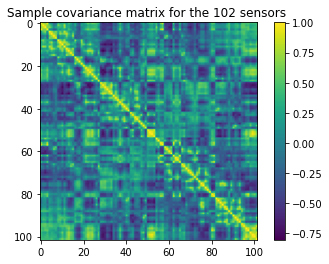

In [133]:
# import seaborn as sns
# sns.heatmap(covariance_data)
plt.figure()
plt.imshow(covariance_data)
plt.title("Sample covariance matrix for the 102 sensors ")
plt.colorbar()
plt.show()

vi. What does the off-diagonal activation imply about the independence of the signals measured by
the 102 sensors?

That they do not pick up independent signals - we see a pretty high covariance for several sensors. This makes sense intuitively; since many of the sensors are placed close to each other on the head, they will pick up some of the same signals.

In [110]:
# vii. Run np.linalg.matrix_rank on the covariance matrix - what integer value do you get? (we’ll use this later)
int_co_data = np.linalg.matrix_rank(covariance_data)
print("The integer value is",int_co_data)


The integer value is 97


In [136]:
# viii. Find the eigenvalues and eigenvectors of the covariance matrix using np.linalg.eig - note that some of the numbers returned are complex numbers, consisting of a real and an imaginary part (they have a j next to them). We are going to ignore this by only looking at the real parts of the eigenvectors and -values. Use np.real to retrieve only the real part


eigen_values, eigen_vectors = np.linalg.eig(covariance_data)
eigen_values = np.real(eigen_values)
eigen_vectors = np.real(eigen_vectors)
print(eigen_values)


[ 2.75899013e+01  1.70135037e+01  1.20623802e+01  6.86112203e+00
  6.30255446e+00  3.60999333e+00  3.39474030e+00  2.80486047e+00
  2.40660043e+00  2.23670134e+00  1.82040775e+00  1.30074519e+00
  1.13844453e+00  1.07401108e+00  8.99973351e-01  8.52895335e-01
  7.70094651e-01  5.95763944e-01  5.71778469e-01  5.32522509e-01
  4.91658072e-01  4.34051388e-01  3.86047191e-01  3.23217802e-01
  3.03449802e-01  2.90532215e-01  2.68613401e-01  2.54192561e-01
  2.42032128e-01  2.31829004e-01  2.15001267e-01  2.08758684e-01
  1.96030261e-01  1.81504243e-01  1.68812716e-01  1.62725997e-01
  1.51363346e-01  1.46375917e-01  1.48743837e-01  1.34500142e-01
  1.30215432e-01  1.26184375e-01  1.15825562e-01  1.20297965e-01
  1.19084896e-01  1.12436304e-01  1.03904184e-01  1.02285205e-01
  1.00841385e-01  9.52798720e-02  9.28039853e-02  8.83030573e-02
  8.50102705e-02  8.24303384e-02  8.10219668e-02  7.64121625e-02
  7.56933372e-02  7.31474633e-02  7.14276726e-02  1.35594719e-02
  6.88243712e-02  6.71282

2) Create the weighting matrix W and the projected data, Z

In [112]:
# i. We need to sort the eigenvectors and eigenvalues according to the absolute values of the eigenvalues (use np.abs on the eigenvalues).

eig_abs = np.abs(eigen_values)

In [113]:
# ii. Then, we will find the correct ordering of the indices and create an array, e.g. sorted_indices that contains these indices. We want to sort the values from highest to lowest. For that, use np.argsort, which will find the indices that correspond to sorting the values from lowest to highest. Subsequently, use np.flip, which will reverse the order of the indices.
sorted_indices = np.flip(np.argsort(eig_abs))
sorted_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  31,  30,  32,  34,  33,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  56,  55,  57,  58,  59,  61,  64,  66,  72,  70,
        71,  74,  76,  77,  78,  82,  92,  91,  94,  88,  86,  95,  90,
        84,  85,  93,  89,  83,  96,  87,  81,  80,  79,  75,  73,  69,
        68,  67,  65,  63,  62,  60,  97,  99, 100, 101,  98])

In [114]:
# iii. Finally, create arrays of sorted eigenvalues and eigenvectors using the sorted_indices array just created. For the eigenvalues, it should like this eigenvalues = eigenvalues[sorted_indices] and for the eigenvectors: eigenvectors = eigenvectors[:, sorted_indices]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:,sorted_indices]


/var/folders/tq/0p82818x4jd9plq_7b32kjl00000gn/T/ipykernel_23010/3004464238.py:4: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(sort_eig_val), 'bo')


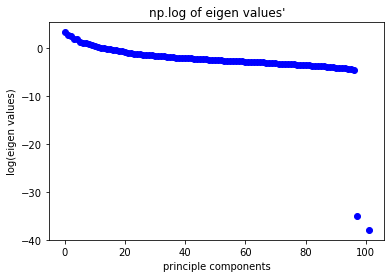

/var/folders/tq/0p82818x4jd9plq_7b32kjl00000gn/T/ipykernel_23010/3004464238.py:11: RuntimeWarning: invalid value encountered in log
  log_eigen = np.log(eigen_values)


array([  3.35674527,   2.78212014,   2.48213471,   1.96283254,
         1.87756779,   1.27117459,   1.1839596 ,   1.01048866,
         0.948959  ,   0.72238718,   0.5700768 ,   0.28292523,
         0.09604088,   0.04305278,  -0.05864892,  -0.16988542,
        -0.27964178,  -0.42950715,  -0.50004516,  -0.62360666,
        -0.70384654,  -0.91615604,  -1.03417312,  -1.10980711,
        -1.17297602,  -1.23151451,  -1.32730589,  -1.36219089,
        -1.40232561,  -1.44736119,  -1.55341719,  -1.53346189,
        -1.59666964,  -1.72256598,  -1.69768001,  -1.80960706,
        -1.91363889,  -1.94362535,  -1.95069178,  -2.00087052,
        -2.03933315,  -2.08101912,  -2.0976541 ,  -2.17395025,
        -2.20176023,  -2.26938203,  -2.30012474,  -2.33705031,
        -2.38338011,  -2.41725376,  -2.43001836,  -2.4791752 ,
        -2.53186376,  -2.58136232,  -2.59020077,  -2.63452201,
        -2.61808854,  -2.68200561,  -2.72877278,  -2.74791774,
        -2.86253059,  -2.92204887,  -2.96058587,  -3.20

In [134]:
# iv. Plot the log, np.log, of the eigenvalues, plt.plot(np.log(eigenvalues), 'o') - are there some values that stand out from the rest? In fact, 5 (noise) dimensions have already been projected out of the data - how does that relate to the matrix rank (Exercise 1.1.vii)

plt.figure()
plt.plot(np.log(sort_eig_val), 'bo')
plt.title("np.log of eigen values'")
plt.ylabel("log(eigen values)")
plt.xlabel("principle components")
plt.show()

#logged version for interpretation
log_eigen = np.log(eigen_values)
log_eigen[sorted_indices] #the five last values are extremely negative


Yes 5 values stand out from the rest. When looking at the sorted_indices it is evident that the last 5 values are much more negative (-35 to -39) than the rest 97 values. In fact, these 97 values are directly related to the 97 values in the matrix rank.


In [ ]:
# v. Create the weighting matrix, W (it is the sorted eigenvectors)

In [ ]:
# vi. Create the projected data, Z, Z = XW - (you can check you did everything right by checking whether the X you get from X = ZWT is equal to your original X, np.isclose may be of help)

In [ ]:
# vii. Create a new covariance matrix of the principal components (n=102) - plot it! What has happened off-diagonal and why?